<a href="https://www.kaggle.com/thisaramadawalage/cyclistic-data-analysis-for-google-da-cert?scriptVersionId=88745687" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Prepare Data for Analysis



To process the data, I'm going to use python pandas and numpy libraries.

First, let's import these libraries.

In [1]:
import numpy as np
import pandas as pd

## Data

Data used for this project is provided by Google as a part of the course material. A kaggle data set was created with the data by including all the data from 2021 and added to this project.

The data set contains seperate .csv files containing the user data for each month of the year 2021. Each file was imported as a seperate data frame object, and then concatonated together to make a singe dataframe with all the data from 2021. All the files were checked to see if they have the same column titles, prior to creating the unified dataframe. This data set will be cleaned and analyzed to see what sort of differences the member and casual users have.

In [2]:
jan = pd.read_csv('../input/bike-data/202101-divvy-tripdata/202101-divvy-tripdata.csv')
feb = pd.read_csv('../input/bike-data/202102-divvy-tripdata/202102-divvy-tripdata.csv')
mar = pd.read_csv('../input/bike-data/202103-divvy-tripdata/202103-divvy-tripdata.csv')
apr = pd.read_csv('../input/bike-data/202104-divvy-tripdata/202104-divvy-tripdata.csv')
may = pd.read_csv('../input/bike-data/202105-divvy-tripdata/202105-divvy-tripdata.csv')
jun = pd.read_csv('../input/bike-data/202106-divvy-tripdata/202106-divvy-tripdata.csv')
jul = pd.read_csv('../input/bike-data/202107-divvy-tripdata/202107-divvy-tripdata.csv')
aug = pd.read_csv('../input/bike-data/202108-divvy-tripdata/202108-divvy-tripdata.csv')
sep = pd.read_csv('../input/bike-data/202109-divvy-tripdata/202109-divvy-tripdata.csv')
octo = pd.read_csv('../input/bike-data/202110-divvy-tripdata/202110-divvy-tripdata.csv')
nov = pd.read_csv('../input/bike-data/202111-divvy-tripdata/202111-divvy-tripdata.csv')
dec = pd.read_csv('../input/bike-data/202112-divvy-tripdata/202112-divvy-tripdata.csv')

In [3]:
df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec], axis=0)

## Checking the data for inconsistancies

First, lets take a look at the different types of data available in the table.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


We can see that,
* The dataframe have 12 columns and 5,595,063 rows of data.
* The **started_at** and **ended_at** columns are in the wrong data type. They will needed to be converted to **datetime** type before using them to process the data.
* There are several values missing, even at the start of the table in the columns **end_station_name** and **end_station_id**.
* The geographical coordinates of the starting and ending stations have inconsistant formatting, to each other.
* There are no personally identifiable information about the users, so we will not be able to find details about recurring users.

## Cleaning the data

First, let's check to see if there are any duplicate entries in this dataframe.

In [6]:
for i in df.duplicated():
    if i:
        print(df.ride_id)
print('done')

done


There are no duplicate entries in this data frame.

## Remove the unwanted columns of data
For the purpose of this analysis, we do not need to consider the location of the users. Adding on to that, some of the records are missing the values for starting and ending stations. Therefore, let us remove the column containing locational data from the dataframe as this will help us process the dataframe quicker.

In [7]:
df = df.drop(['start_station_name','start_station_id','end_station_name','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis = 1)

## Converting data types

As disucssed earlier, the **started_at** and **ended_at** columns need to be changed to the **datetime** data type.

In [8]:
df['started_at'] = pd.to_datetime(df.started_at)
df['ended_at'] = pd.to_datetime(df.ended_at)

Now, let us create new columns of data for **trip_time**, **day_of_week**, **month** and **time_of_day** (based on the time the order was started), so that we can analyze the differences in the use of the bicycles over time.

In [9]:
df['trip_time']= pd.to_timedelta((df.ended_at - df.started_at), unit='m').astype('timedelta64[m]')
df['day_of_week'] = df.started_at.dt.day_name()
df['month'] = df.started_at.dt.month_name()
df['time_of_day'] = df.started_at.dt.hour

Let us again check the data in the dataframe after cleaning.

In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,trip_time,day_of_week,month,time_of_day
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,10.0,Saturday,January,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,4.0,Wednesday,January,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,1.0,Thursday,January,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,11.0,Thursday,January,13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0.0,Saturday,January,2


In [11]:
df.describe()

,trip_time,time_of_day
count,5.595063e+06,5.595063e+06
mean,2.144580e+01,1.424177e+01
std,1.783332e+02,5.052284e+00
min,-5.900000e+01,0.000000e+00
25%,6.000000e+00,1.100000e+01
50%,1.200000e+01,1.500000e+01
75%,2.100000e+01,1.800000e+01
max,5.594400e+04,2.300000e+01


Now, let's save this to a .csv file named **cleaned_bike_data**.

In [12]:
df.to_csv('cleaned_bike_data.csv', index = False)

Now, let's take this data and analyze it in tableau to find out the differences between the casual users and the members.

# Analysis Using Tableau

## Usage of Bicycles Throughout The Year

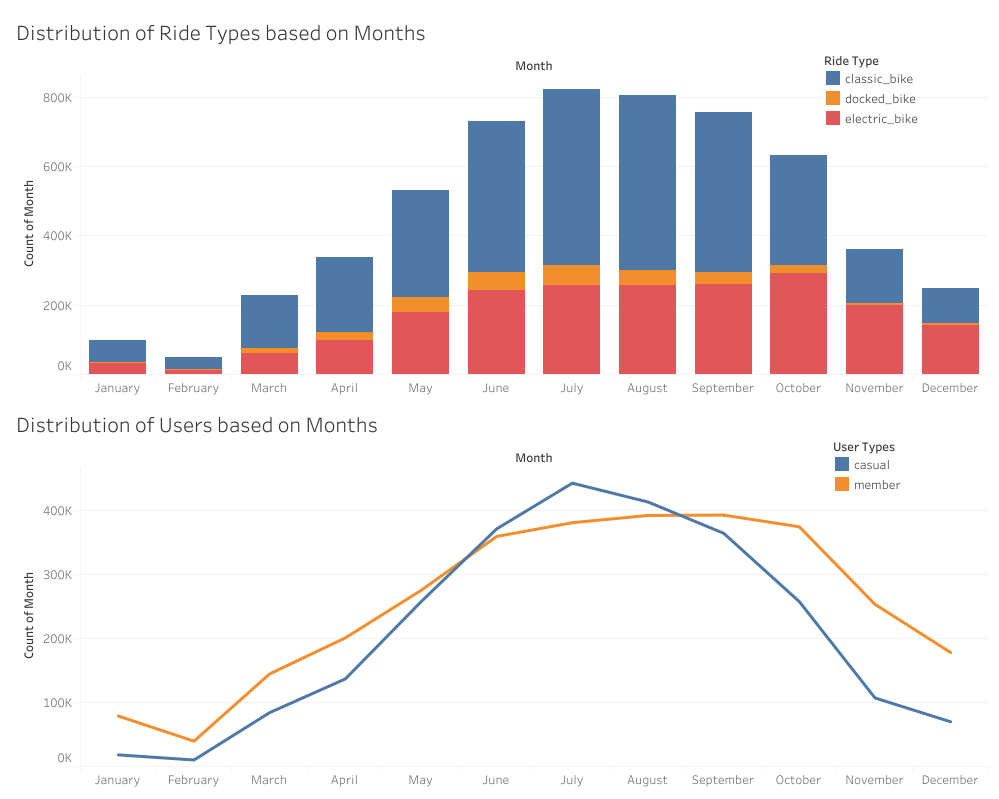

As we can see here, the use of the bicycles seems to follow a seasonal trend with more people using the service throught the summer months and lowest number of people using the service during the winter months of the year. 

We can also see that the casual and member users of the service follow a similar trend and most of the people using the service in the winter months are members.


## Usage of Bicycles Through a Week

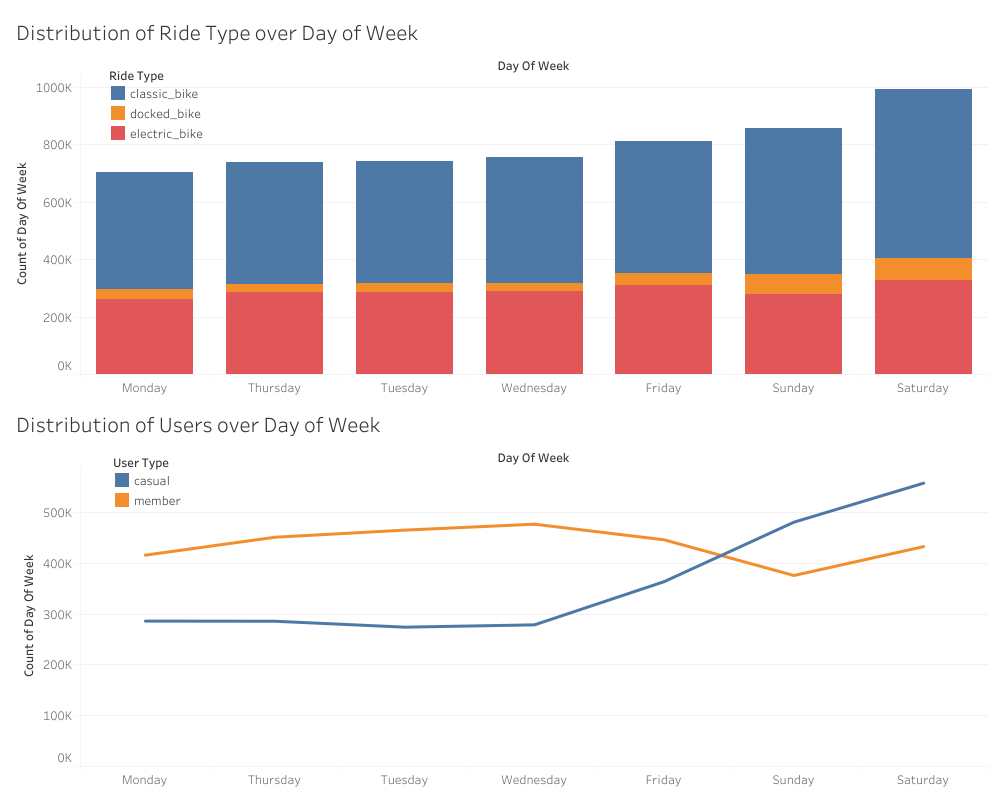

We can see that monday through thursday, the number of users remain realtively constant and that the number increase from friday and peaks during the weekend.

We can also see that most of the users that use the service through the weekdays are members and most of the weekend users are casual users.


## Usage of Bicycles Through Time of Day

For this, I have considered the start time of all the querries available.

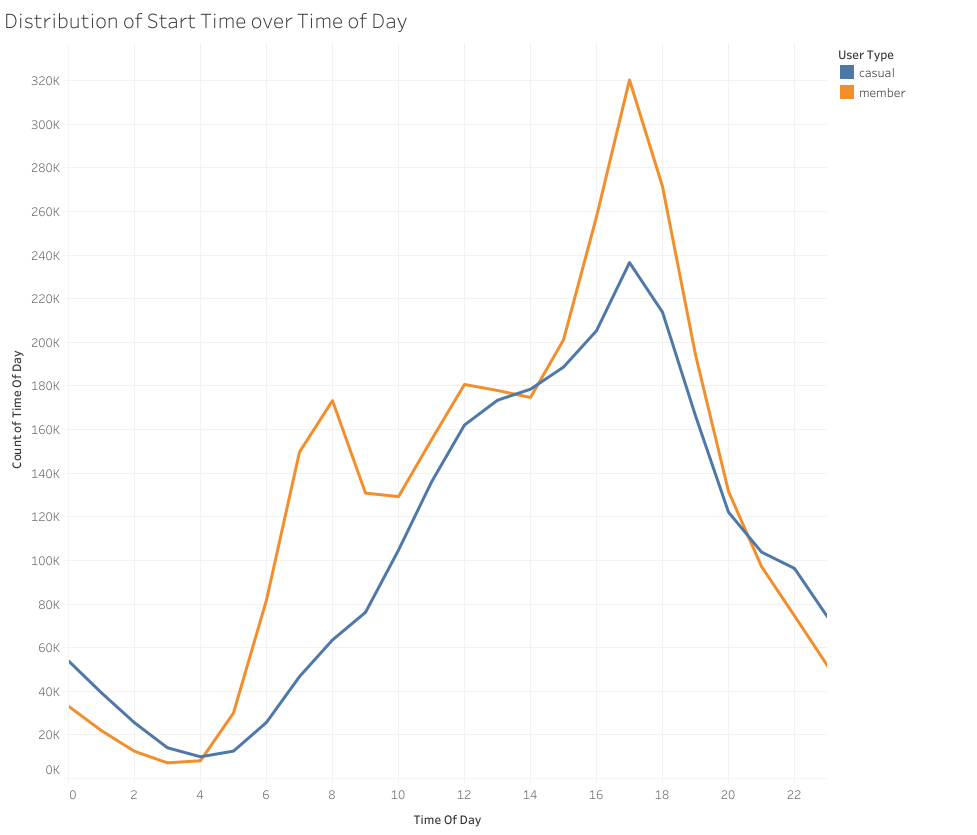

Here, we can see that there are two distinct peaks for the member users during the day. There is a morining peak around 8.00 A.M. and there is a much higher evening peak around 5.00 P.M. This corrosponds to the 9.00 to 5.00 working hours of the day. 

Let us analyze the start times throughout the weekdays.

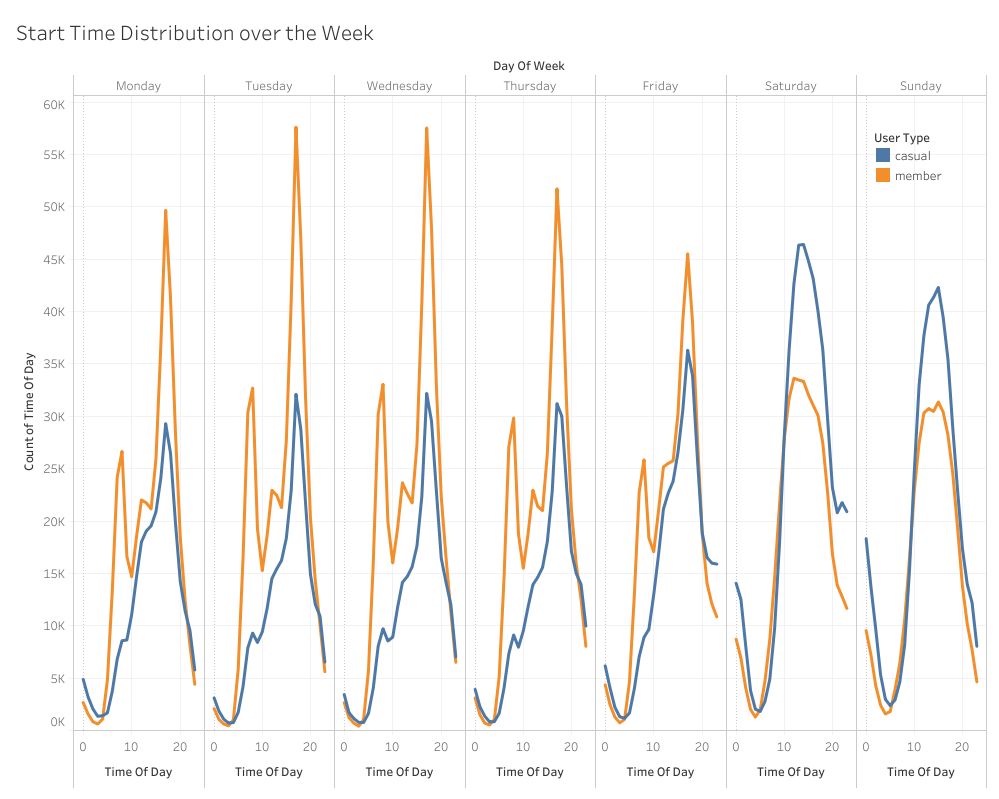

We can see that the morning peaks only appear during the weekdays. Moreover we can also see that there is also a morning peak for casual users during the weekdays and that the casual usage is almost identical during the weekdays.

Therefore, we can assume that most of the users during the weekdays use the service for communting to and back from work.

During weekends, the start time peaks around mid-day and a much higher rate of casual users can be seen over the members.


## Use of Bicycle Types by Users

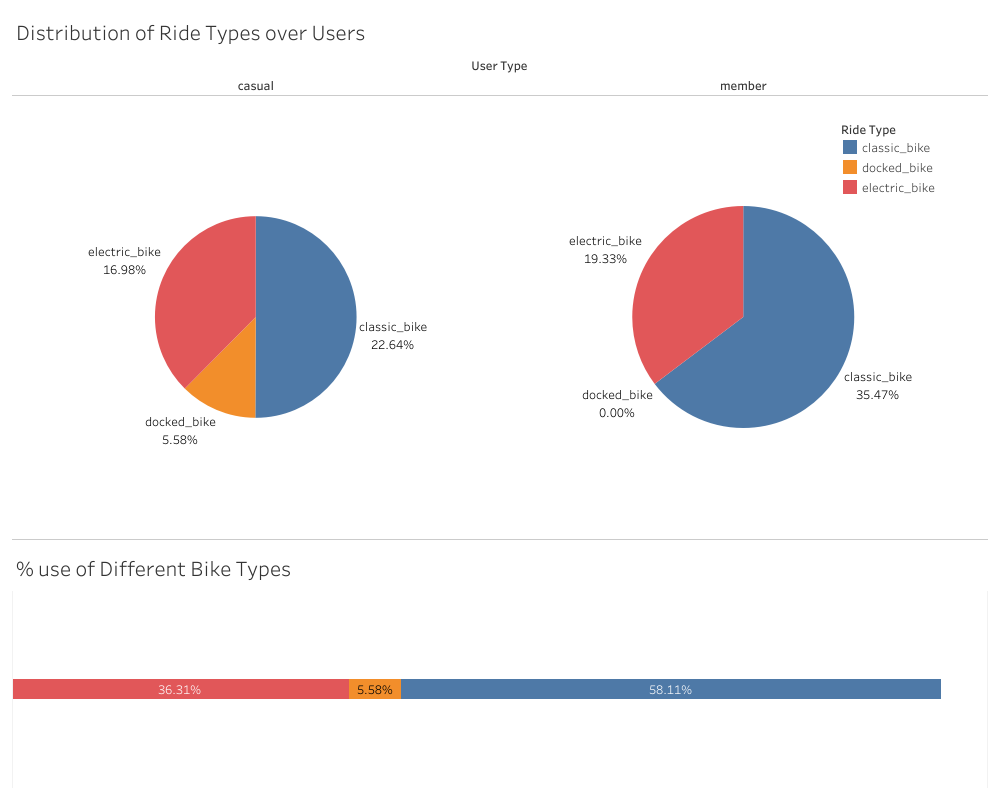

Here we can see that many of the classical bike is the most popular bike among members and casual users alike. Over a half of the uses are on a classical bike. We can also see that the docked bike is almost only used by the casual users and the rest of the instances people have used the electrical bikes.


## Analysis over Time of Use

Let us now analyze the total time the bikes were used by the members and the casual users.

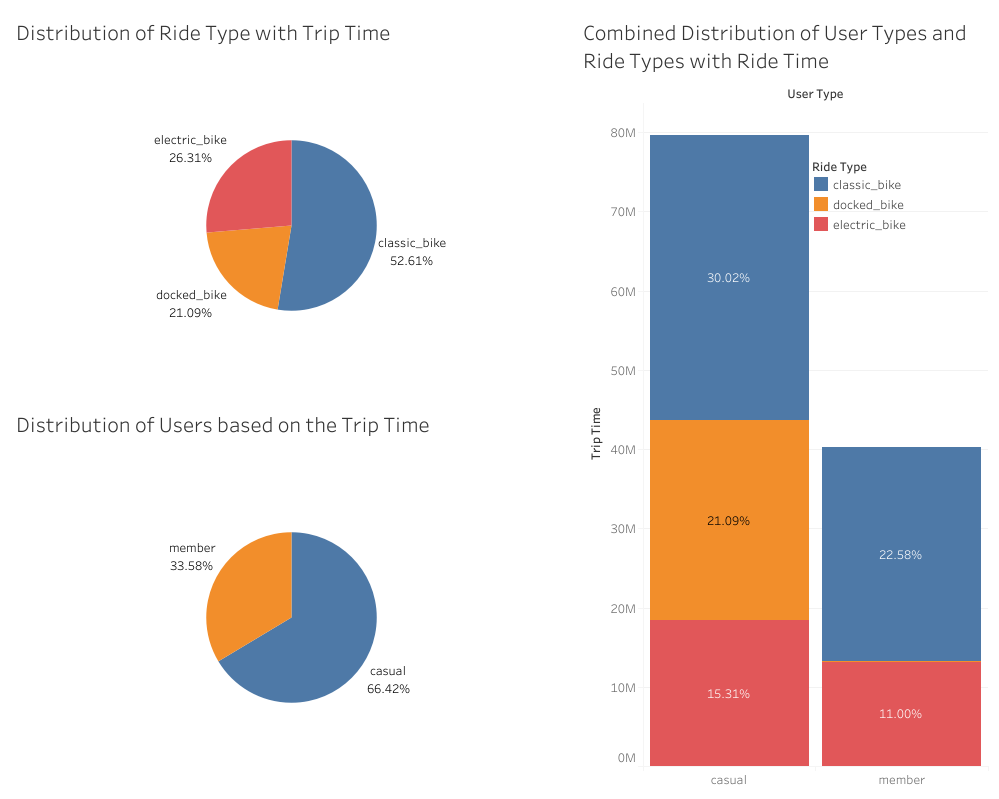

Here, we can see that the casual usage is almost twice as much as the member useage of the service and thus, casual users account for most use of the service measured by the time used.

## Conclusion
Following recocomendations can be given considering the analysis conducted above.
* We can see that the casual users account for more use of the service than the members. Therefore, it would be wise to advice against the decision to focus more on the members.
* It is also advisable to investigate further into why casual use time is so overwhelmingly large when compared with member use time.
* It seems that there is a set of casual users who use the service during their weekday commutes. Marketing campaigns targeting these people could yeild in an increase of the members of the service.

## Apendix

The tableau dashboards created can be found below.

**The tableau public viz can be seen [here](https://public.tableau.com/views/CyclisticDataAnalysis_16457744734700/DistributionoverMonths?:language=en-US&:display_count=n&:origin=viz_share_link)**

In [13]:
%%HTML
<div class='tableauPlaceholder' id='viz1645776052023' style='position: relative'>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='CyclisticDataAnalysis_16457744734700&#47;DistributionoverMonths' />
<param name='tabs' value='yes' />
<param name='toolbar' value='yes' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object
></div>         

<script type='text/javascript'> 
var divElement = document.getElementById('viz1645776052023'); 
var vizElement = divElement.getElementsByTagName('object')[0];
if ( divElement.offsetWidth > 800 ) { 
    vizElement.style.minWidth='1000px';
    vizElement.style.maxWidth='100%';
    vizElement.style.minHeight='850px';
    vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';
} 
else if ( divElement.offsetWidth > 500 ) { 
    vizElement.style.minWidth='1000px';
    vizElement.style.maxWidth='100%';
    vizElement.style.minHeight='850px';
    vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';
} else { 
    vizElement.style.width='100%';
    vizElement.style.minHeight='800px';
    vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';
} 
var scriptElement = document.createElement('script'); 
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js'; 
vizElement.parentNode.insertBefore(scriptElement, vizElement); 
</script>